In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv(r'C:\Users\fabio\Documents\DataSets\csv_data\master.csv')

In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [7]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [8]:
df = df.rename({df.columns[9] : 'GDP for year', df.columns[10] : 'GDP per Capita'}, axis=1).drop(['country-year','HDI for year'], axis=1)
df['GDP for year'] = df['GDP for year'].apply(lambda x:x.replace(',', '')).astype(np.int64)
df = df.query('year != 2016')

In [160]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [162]:
population_year = df.groupby(['year']).sum().population.values
suicides_year = df.groupby(['year']).sum().suicides_no.values
suicides_per_100k_year = (suicides_year / population_year) * 100000

In [163]:
trace = go.Scatter(x=np.unique(df['year'].values),
                   y=suicides_per_100k_year,
                   mode='lines+markers',
                   name='suicides/100k pop')

layout = dict(title='Suicide Rates Worldwide (per 100k)', 
              xaxis=dict(title='Year'), 
              yaxis=dict(title='Number of Suicides (per 100k)', tickmode='linear'))
fig = dict(data=[trace], layout=layout)
iplot(fig)

In [9]:
from bokeh.io import output_notebook, output_file, show
from bokeh.plotting import figure
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource, NumeralTickFormatter, FactorRange
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
output_notebook()

Loading BokehJS ...

In [10]:
colors = [color for (_, color) in Category20.items()]

In [11]:
data = df.groupby(['country']).sum().suicides_no.nlargest(30).reset_index()

dt = df.groupby(['country']).sum()
suicides = dt.suicides_no.values
population = dt.population.values
suicides_per_100k = (suicides / population) * 100000

dt['suicides/100k pop'] = suicides_per_100k
dt = dt['suicides/100k pop'].nlargest(30).reset_index()

In [12]:
countries = np.flip(data['country'].values)
suicides_country = np.flip(data['suicides_no'].values)
countries_100k = np.flip(dt['country'].values)
suicides_country_100k = np.flip(dt['suicides/100k pop'].values)

In [13]:
source = ColumnDataSource(data=dict(suicides_country=suicides_country, countries=countries, 
                                     suicides_country_100k=suicides_country_100k, countries_100k=countries_100k))

p1 = figure(y_range=countries,
           plot_height=600, 
           plot_width=480, 
           toolbar_location=None)

p1.hbar(y='countries',
       right='suicides_country',
       height=0.8,
       source=source)

p1.xaxis.formatter=NumeralTickFormatter(format="0")
p1.ygrid.grid_line_color = None
p1.x_range.start = 0


p2 = figure(y_range=countries_100k,
           plot_height=600, 
           plot_width=480, 
           toolbar_location=None)

p2.hbar(y='countries_100k',
       right='suicides_country_100k',
       height=0.8,
       source=source)

p2.ygrid.grid_line_color = None
p2.x_range.start = 0
p2.xaxis.formatter=NumeralTickFormatter(format="0")
show(row([p1, p2]))

The bar char on left hand side shows that Russian Federation has the highest amount of suicides. But if we examine the rates of suicide, we see that Lithuania is at the top, with more than 40 suicides per 100000 people.

In [123]:
def b_plot(x, y, p_width=400, p_height=400, line_color='blue',  circle_color='blue', title='', legend='', grid_color=None, grid_alpha=0.9, x_label='', y_label=''):
    p = figure(plot_width=p_width, plot_height=p_height, title=title, toolbar_location=None)
    p.xgrid.grid_line_color=grid_color
    p.ygrid.grid_line_alpha=grid_alpha
    p.yaxis.axis_label = y_label
    p.xaxis.axis_label = x_label
    p.line(x, y, line_width=2, color=line_color, legend=legend)
    p.circle(x, y, size=4, color=circle_color, legend=legend)
    return p

In [152]:
data = df.groupby(['sex', 'year']).sum()

In [153]:
suicides_women  = data.loc['female', 'suicides_no'].values
population_women = data.loc['female', 'population'].values
suicides_100k_women = (suicides_women / population_women) * 100000
data.loc['female', 'suicides/100k pop'] = suicides_100k_women

suicides_men = data.loc['male', 'suicides_no'].values
population_men = data.loc['male', 'population'].values
suicides_100k_men = (suicides_men / population_men) * 100000
data.loc['male', 'suicides/100k pop'] = suicides_100k_men

suicides_100k_women_year = data.loc['female', 'suicides/100k pop'].values
suicides_100k_men_year = data.loc['male', 'suicides/100k pop'].values

year = data.reset_index().year.unique()

In [154]:
p1 = b_plot(year, 
          suicides_100k_men_year, 
          p_width=450, 
          p_height=200, 
          title='Suicides, per 100k, per year (Male Population).', 
          x_label='Year', 
          y_label='Suicides (per 100k)')

p2 = b_plot(year, 
          suicides_100k_women_year, 
          p_width=450, 
          p_height=200,
          title='Suicides, per 100k, per year (Female Population).',
          x_label='Year', 
          y_label='Suicides (per 100k)',
          line_color='orange',
          circle_color='orange',
         )
    
p3 = b_plot(year,
            data.suicides_no.male.values,
            p_width=500, 
            p_height=400,
            title='Suicides, per year (by Gender).',
            x_label='Year',
            y_label='Number of Suicides',
            legend='male')

p3.line(year, data.suicides_no.female.values, legend='female', line_width=2, color='orange')
p3.circle(year, data.suicides_no.female.values, legend='female', size=4, color='orange')
p3.yaxis.formatter=NumeralTickFormatter(format="0")
p3.legend.location = "top_left"

In [155]:
genders = ['male', 'female']
ages = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
dt = df.groupby(['sex', 'age']).sum().reindex(level='age', index=ages).iloc[:, :-2]

age_gender = [(age, gender) for age in ages for gender in genders] 
suicides = sum(zip(dt.loc['male', 'suicides_no'].tolist(), dt.loc['female', 'suicides_no'].tolist()), ())

source = ColumnDataSource(data=dict(age_gender=age_gender, suicides=suicides))

p4 = figure(x_range=FactorRange(*age_gender), 
            plot_height=350, 
            plot_width=500, 
            title='Suicides, by Age range and Gender', 
            toolbar_location=None)

p4.vbar(x='age_gender', 
        top='suicides', 
        width=0.9, 
        source=source, 
        line_color='white',
        fill_color=factor_cmap('age_gender', palette=['blue', 'orange'], factors=genders, start=1, end=2))


p4.y_range.start = 0
p4.x_range.range_padding = 0.1
p4.yaxis.axis_label = 'Number of Suicides'
p4.xaxis.major_label_orientation = 1
p4.yaxis.formatter=NumeralTickFormatter(format="0")
p4.xgrid.grid_line_color = None

In [158]:
fem_pop = dt.loc['female','population'].values
male_pop = dt.loc['male','population'].values

suicides_men = dt.loc['male', 'suicides_no'].values
suicides_women = dt.loc['female', 'suicides_no'].values

suicides_100k_women = (suicides_women / fem_pop) * 100000
suicides_100k_men =  (suicides_men / male_pop) * 100000
dt.loc['female', 'suicides/100k pop'] = suicides_100k_women
dt.loc['male', 'suicides/100k pop'] = suicides_100k_men

suicides_per_100k_age = sum(zip(dt.loc['male', 'suicides/100k pop'].tolist(), dt.loc['female', 'suicides/100k pop'].tolist()), ())

source = ColumnDataSource(data=dict(age_gender=age_gender, suicides_per_100k_age=suicides_per_100k_age))

p5 = figure(x_range=FactorRange(*age_gender), 
            plot_height=350, 
            plot_width=450, 
            title='Suicides, by Age range and Gender, per 100k.',
            toolbar_location=None)

p5.vbar(x='age_gender', 
        top='suicides_per_100k_age', 
        width=0.9, 
        source=source, 
        line_color='white',
        fill_color=factor_cmap('age_gender', palette=['blue', 'orange'], factors=genders, start=1, end=2))

p5.y_range.start = 0
p5.x_range.range_padding = 0.1
p5.yaxis.axis_label = ''
p5.xaxis.major_label_orientation = 1
p5.yaxis.formatter=NumeralTickFormatter(format="0")
p5.xgrid.grid_line_color = None

In [159]:
show(row(p3, column([p1, p2])))
show(row(p4, p5))

- We can see that, from 1985 to 2015, the rate of suicides was higher for men than for women. 
- The ratio are approximately 3:1. In other words, _for every suicide committed by women, there were three suicides committed by men_. 
- Rate of suicides per 100000 people per year peaks at 1995 for both genders. 
- Middle-aged men committed the most suicides, as we can see from the vertical bar plots.
- People over 75 years committed the highest number of suicides, per 100000 people.

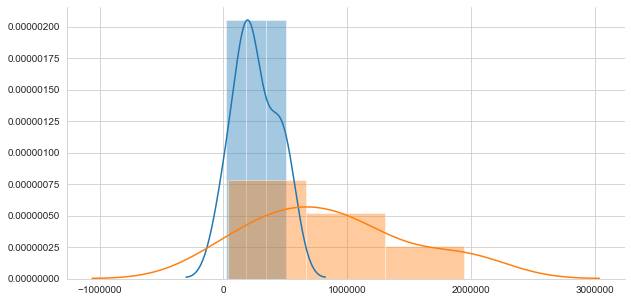

In [26]:
dt = df.groupby(['sex', 'age']).sum().suicides_no.reindex(level='age', index=ages)
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.distplot(dt.loc['female'].values)
sns.distplot(dt.loc['male'].values)
sns.despine()

We can see that suicides by age range are normally distributed.

In [27]:
from bokeh.layouts import gridplot

In [28]:
data = df.groupby(['sex', 'year', 'age']).sum().suicides_no.reindex(level='age', index=ages)
years = data.index.get_level_values('year').unique()

In [29]:
plots = []
for year in years:
    suicides = sum(zip(data.loc['male', year].tolist(), data.loc['female', year].tolist()), ())
    
    source = ColumnDataSource(data=dict(age_gender=age_gender, suicides=suicides))
    
    p = figure(x_range=FactorRange(*age_gender),
            title='Suicides, by age range and gender, in {}'.format(year),
            toolbar_location=None)
    
    p.vbar(x='age_gender', 
        top='suicides', 
        width=0.9, 
        source=source, 
        line_color='white',
        fill_color=factor_cmap('age_gender', palette=['blue', 'orange'], factors=genders, start=1, end=2))
    
    p.y_range.start = 0
    p.x_range.range_padding = 0.1
    p.yaxis.axis_label = 'Number of Suicides'
    p.xaxis.major_label_orientation = 1
    p.yaxis.formatter=NumeralTickFormatter(format="0")
    p.xgrid.grid_line_color = None
    plots.append(p)
grid = gridplot(plots, ncols=2, plot_width=470, plot_height=260, toolbar_location=None)
show(grid)

 - Suicides, for both genders, are commun between the ages of 35 and 54.
 - Men between the ages of 35 and 54 committed the heighest number of suicides.
 - For every year, we can see the same pattern.

In [30]:
data = df.groupby(['sex', 'year', 'country']).sum().loc[:, 'suicides_no']
dt = df.groupby(['year', 'country']).sum().iloc[:, :1]

(data.loc['female']>data.loc['male']).value_counts(normalize=True)

False    0.996529
True     0.003471
Name: suicides_no, dtype: float64

In [31]:
dt_f = dt[data.loc['female']>data.loc['male']]

genders = ['female', 'male']
years = dt_f.index.get_level_values('year')
countries = dt_f.index.get_level_values('country')

In [32]:
rows = [(gender, *year_country) for gender in genders for year_country in zip(years, countries)]

In [33]:
data[rows]

sex     year  country            
female  1986  Malta                   1
        1990  Paraguay               50
        1992  Luxembourg             30
        1995  Grenada                 1
        1997  Kuwait                 17
        2004  Maldives                1
        2008  Barbados                1
        2015  Antigua and Barbuda     1
male    1986  Malta                   0
        1990  Paraguay               49
        1992  Luxembourg             29
        1995  Grenada                 0
        1997  Kuwait                 16
        2004  Maldives                0
        2008  Barbados                0
        2015  Antigua and Barbuda     0
Name: suicides_no, dtype: int64

It appears that the only countries whose rate of suicides are higher for women than for men, for a particular year, are those shown above. Nevertheless, the difference is almost negligible.

In [151]:
data = df.copy()
data = data.select_dtypes(include=['number'])

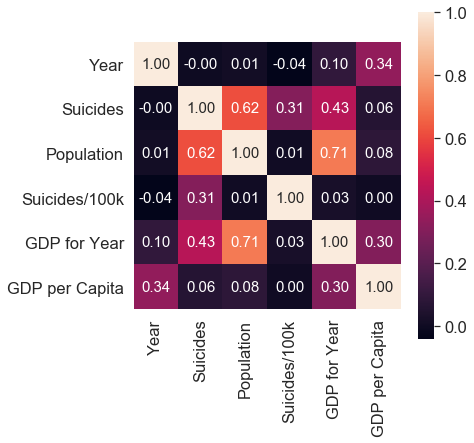

In [36]:
#Correlation Matrix
plt.figure(figsize=(6, 6))
xyticklabels = ['Year', 'Suicides', 'Population', 'Suicides/100k', 'GDP for Year', 'GDP per Capita']
cm = np.corrcoef(data[data.columns].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=xyticklabels,
            xticklabels=xyticklabels,
           )

plt.show()

As shown in the above correlation matrix, the number of suicides and the population of a certain country are highly correlated. Suicides and GDP for year also show some degree of correlation. Correlation measures linear relationships between variables, and we're going to explore this relationship further in the next cells.

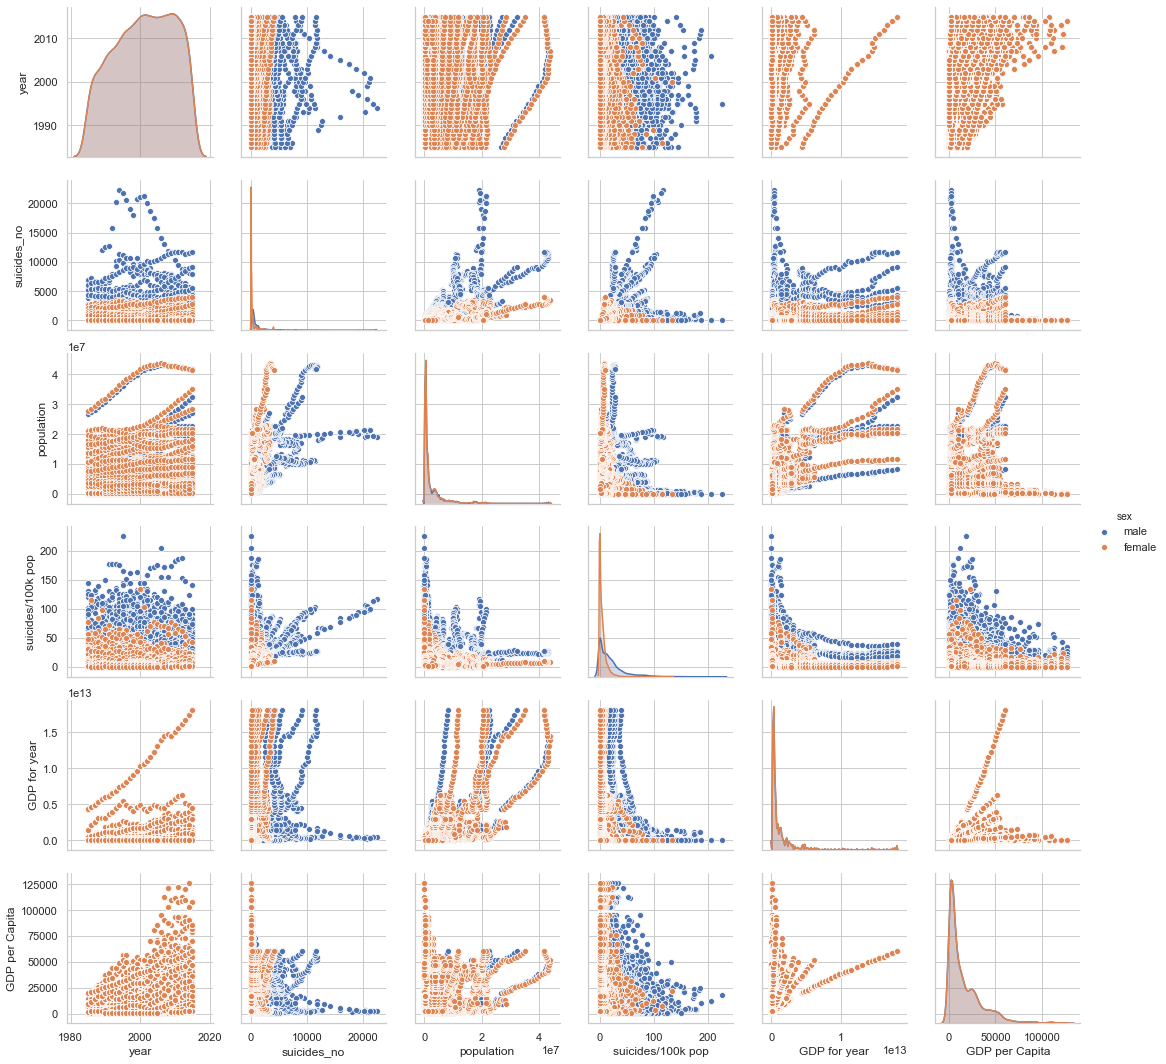

In [137]:
sns.set_style('whitegrid')
sns.pairplot(data=df, hue='sex', palette='deep')
plt.show()

In [133]:
categories_a = df.groupby(['sex'])['suicides_no'].sum().index.tolist()
categories_b = df.groupby(['age']).sum().suicides_no.reindex(index=ages).index.tolist()
categories_c = df.groupby(['country'])['suicides_no'].sum().nlargest(3).index.tolist()
categories_d = df.groupby(['generation'])['suicides_no'].sum().nlargest(4).index.tolist()

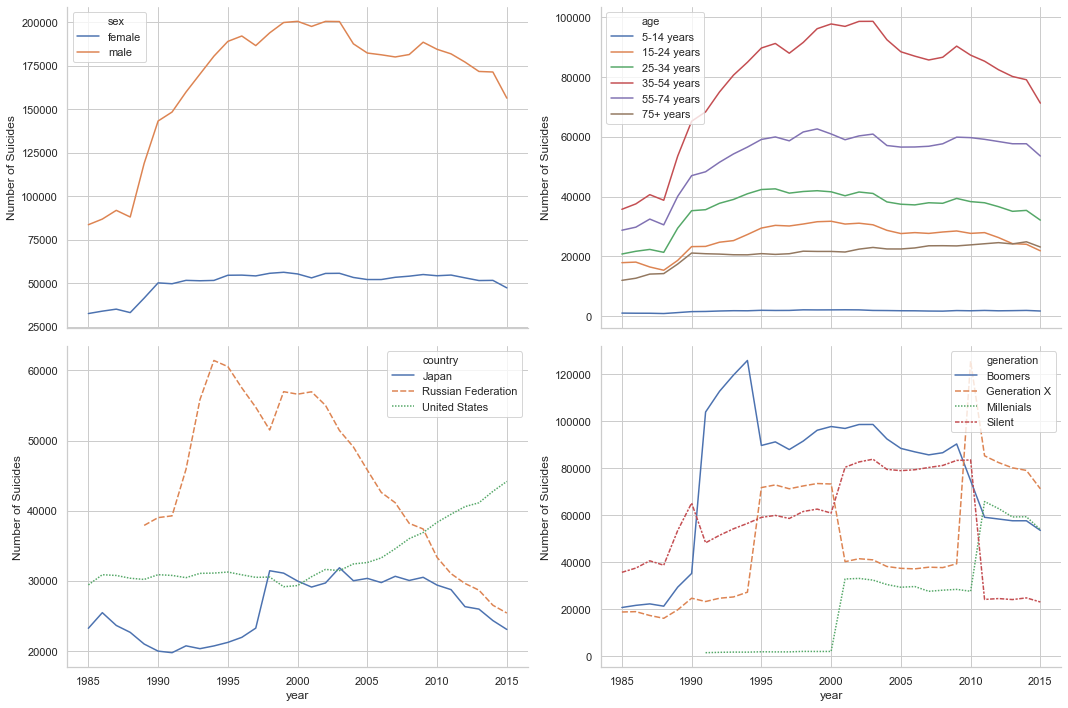

In [136]:
from numpy import median
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, 
                       ncols=2, 
                       figsize=(15, 10), 
                       sharex=True)
 
axes = np.copy(ax.flatten())
columns = ['sex', 'age', 'country', 'generation']
categories = [categories_a, categories_b, categories_c, categories_d]
for col, cat, axis in zip(columns, categories, axes):
    if col in ['age']:
        data = df.groupby([col, 'year']).sum().suicides_no.reindex(level=col, index=ages)
    else:
        data = df.groupby([col, 'year']).sum().suicides_no
    data = data[cat].reset_index()
    cond = col in ['generation', 'country']
    sns.lineplot(x='year', y='suicides_no', hue=col, style=col, data=data, estimator=median, sort=False, dashes=cond, ax=axis, palette='deep')
    axis.set_ylabel("Number of Suicides")
    #axis.legend(loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()    

__These plots summarize what we have seen above.__ 

- As we have already seen, the rate of suicides for men is clearly higher than for women.
- Rates of suicide are higher between middle-aged men. 
- Suicide rates in Russia peaks in the first half of the 1990s, but it's declining ever since.
- The United States shows an almost linear rate between 1985 and 2000. However, from this point onward, it starts to increase year after year. 
- Among the generations, Boomers show the highest rates of suicide, peaking around 1994*.


<font size="2">*_There are some problems with the Generation variable. For this particular plot,  I decided to use it anyway._</font>

In [138]:
def trace_plot(data, categories=None, set_mode='lines+markers', title='', x_label='', y_label=''):
    traces = []
    for cat in categories:
        tr = go.Scatter(x=data[cat].reset_index().year.values,
                        y=data[cat].reset_index().suicides_no.values,
                        mode=set_mode,
                        name=cat)
        traces.append(tr)
    layout = dict(title=title, xaxis=dict(title=x_label), yaxis=dict(title=y_label))
    fig = dict(data=traces, layout=layout)
    return iplot(fig)

In [139]:
data = df.groupby(['sex', 'year', 'country']).sum()

female = data.loc['female'].suicides_no.reset_index()
male = data.loc['male'].suicides_no.reset_index()

data = df.groupby(['country', 'sex']).sum().suicides_no.nlargest(10).reset_index()
dt_sex = df.groupby(['sex', 'year']).sum().suicides_no
trace_plot(dt_sex, categories=['male', 'female'], 
           title='Suicide Rates (by Gender)', 
           x_label='Year', 
           y_label='Number of Suicides')

In [140]:
dt_country = df.groupby(['country', 'year']).sum().suicides_no

In [141]:
trace_plot(dt_country, 
           categories=categories_c, 
           set_mode='lines+markers', 
           title='Suicide Rates Worldwide (Top Three Countries)', 
           x_label='Year', 
           y_label='Number of Suicides')

In [142]:
dt_age = df.groupby(['age', 'year']).sum().suicides_no
trace_plot(dt_age, categories=categories_b, title='Suicide Rates (by age range)', x_label='Year', y_label='Number of Suicides')

In [144]:
dt_sex = df.groupby(['sex', 'year']).sum().suicides_no
trace_plot(dt_sex, categories=['male', 'female'], title='Suicide Rates (by Gender)', x_label='Year', y_label='Number of Suicides')

In [145]:
trace_plot(dt_country, categories=['Brazil'], title='Suicide Rates in Brazil', x_label='Year', y_label='Number of Suicides')

In [146]:
data = df.groupby(['country', 'sex', 'year']).sum().suicides_no
ay1, ay2 = data['Brazil']['male'].values, data['Brazil']['female'].values
years = data['Brazil'].reset_index().year.values

In [147]:
trace1 = go.Scatter(x=years,
                    y=ay1,
                    mode='lines+markers',
                    name='male')

trace2 = go.Scatter(x=years,
                    y=ay2,
                    mode='lines+markers',
                    name='female')
traces = [trace1, trace2]
layout = dict(title='Suicide Rates in Brazil (by gender)', xaxis=dict(title='Year'), yaxis=dict(title='Number of Suicides'))
fig = dict(data=traces, layout=layout)
iplot(fig)

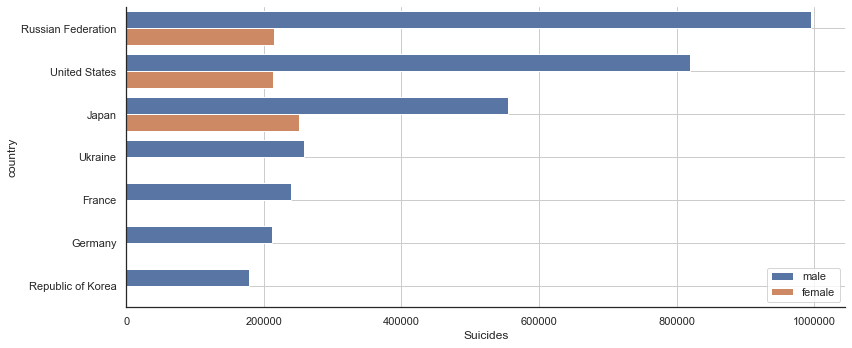

In [150]:
dt = df.groupby(['country', 'sex']).sum().suicides_no.nlargest(10).reset_index()
sns.set_style('white')
plt.figure(figsize=(12, 5))
ax=sns.barplot(x="suicides_no", y="country", hue="sex", orient='h', data=dt, palette="deep")
sns.despine()
ax.set_xlabel('Suicides')
ax.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
#ax = sns.catplot(x='age', y='suicides_no', col='year', hue='sex', data=df, kind='bar', height=4, col_wrap=4)
#ax.set_ylabels("Number of Suicides")
#ax.set_xticklabels(rotation=40)